In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', None)

In [2]:
# Path separator.
separator = '/'

In [3]:
# Taking the absolute path of the current 
# working directory and its parental directory.
absolutepath = os.path.abspath("")
parentDirectory = os.path.dirname(absolutepath)
dataDirectory = parentDirectory + separator + 'data'

In [4]:
# Reading data.
stars = pd.read_csv(dataDirectory + separator + 'gdr2_LMC_LPVs_join_2MASSv2.csv')
PL_stars = pd.read_csv(dataDirectory + separator + 'PL_stars_xm_2MASS.csv')

In [5]:
stars

,source_id,phot_g_mean_mag,phot_rp_mean_mag,phot_bp_mean_mag,parallax,original_ext_source_id,j_m,ks_m
0,5.283212e+18,15.502860,14.376156,16.839407,0.074967,06212995-6658032,12.554,11.049
1,5.283222e+18,15.678679,14.673508,16.664590,-0.014252,06134387-6718585,13.289,12.200
2,5.283225e+18,16.006838,14.682864,18.043493,0.066231,06144306-6718555,12.463,10.396
3,5.283225e+18,15.105094,13.919394,16.582249,-0.029908,06150709-6717186,12.101,10.536
4,5.283228e+18,15.232210,14.109022,16.523075,-0.003431,06150149-6715075,12.283,10.891
...,...,...,...,...,...,...,...,...
10835,4.652048e+18,15.350126,14.141072,16.933624,-0.055168,05084731-7043503,12.225,10.515
10836,4.652049e+18,15.665912,14.457433,17.266893,-0.049452,05090516-7041387,12.516,10.798
10837,4.652049e+18,16.219560,15.026643,17.662224,-0.062622,05091027-7039303,13.170,11.436
10838,4.652049e+18,15.599290,14.530212,16.626505,-0.044455,05085791-7040045,13.065,11.914


In [6]:
W_JK = stars['ks_m'] -0.686 * (stars['j_m'] - stars['ks_m'])
W_G = stars['phot_rp_mean_mag'] - 1.3 * (stars['phot_bp_mean_mag'] \
                                         - stars['phot_rp_mean_mag'])

PL_stars['W_JK'] = PL_stars['Kmag'] - 0.686 * (PL_stars['Jmag']\
                                               - PL_stars['Kmag'])

PL_stars['W_G'] = PL_stars['phot_rp_mean_mag_gedr3'] \
                  - 1.3 * PL_stars['bp_rp_gedr3']

PL_stars['abs_W_JK'] = PL_stars['W_JK'] + 5 * (np.log10(PL_stars['parallax_gedr3']/1000) + 1) 
PL_stars['abs_W_G'] = PL_stars['W_G'] + 5 * (np.log10(PL_stars['parallax_gedr3']/1000) + 1) 
PL_stars['abs_K'] = PL_stars['Kmag'] + 5 * (np.log10(PL_stars['parallax_gedr3']/1000) + 1) 

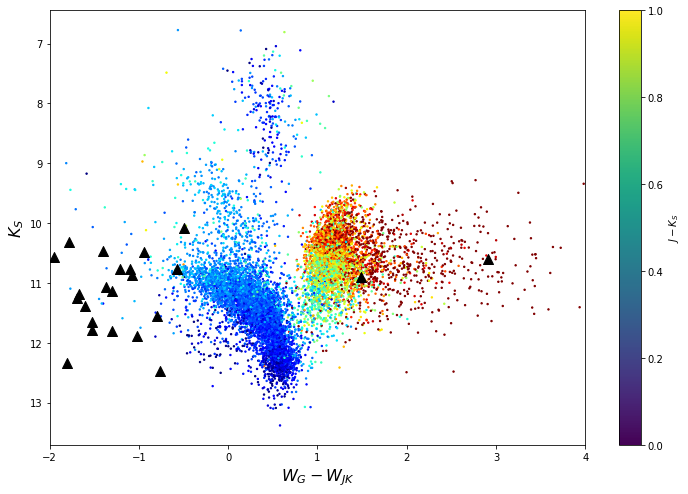

In [7]:
plt.figure(figsize = [12,8])

plt.scatter(W_G - W_JK, stars['ks_m'], 
            c = stars['j_m'] - stars['ks_m'], 
            cmap='jet', vmin=1, vmax=2 ,s=2)

plt.scatter(PL_stars['abs_W_G'] - PL_stars['abs_W_JK'],
            PL_stars['abs_K'] + 18.5 ,
            s= 100, marker='^', color='black')
#            ,c = PL_stars['Jmag']- PL_stars['Kmag'],
#           cmap='jet', vmin=1, vmax=2)

plt.colorbar(label = "$J-K_S$", orientation="vertical",)

plt.xlim(-2,4)
plt.ylabel('$K_S$', fontsize = 16)
plt.xlabel('$W_G - W_{JK}$', fontsize =16)
plt.gca().invert_yaxis()